<a href="https://colab.research.google.com/github/shivamsinoliyainfinity/CNN_model_DSC/blob/master/task__5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/shivamsinoliyainfinity/CNN_model_DSC.git

Cloning into 'CNN_model_DSC'...
remote: Enumerating objects: 912, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 912 (delta 0), reused 5 (delta 0), pack-reused 906
Receiving objects: 100% (912/912), 364.31 MiB | 54.09 MiB/s, done.


In [3]:
# import opencv
import cv2


images = []
lables = []


for i in range(1, 450):
    img = cv2.imread(f"/content/CNN_model_DSC/dataset/marigolds/mari ({i}).png")
  
    gray = img/255
    gray = cv2.resize(gray,(200, 200))
    images.append(gray)
    lables.append(0)  



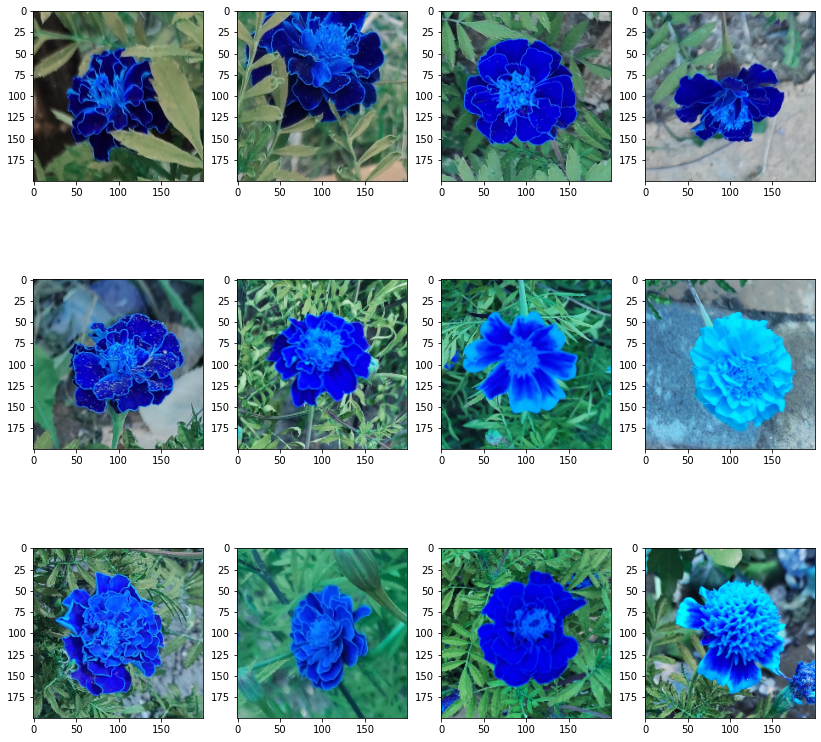

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14,14))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[10 + i**2])
plt.show()

In [5]:
for i in range(1, 450):
    img2 = cv2.imread(f"/content/CNN_model_DSC/dataset/leontodons/leon ({i}).png")
  
    gray2 = img2/255
    gray2 = cv2.resize(gray,(200, 200))
    images.append(gray2)
    lables.append(1)  


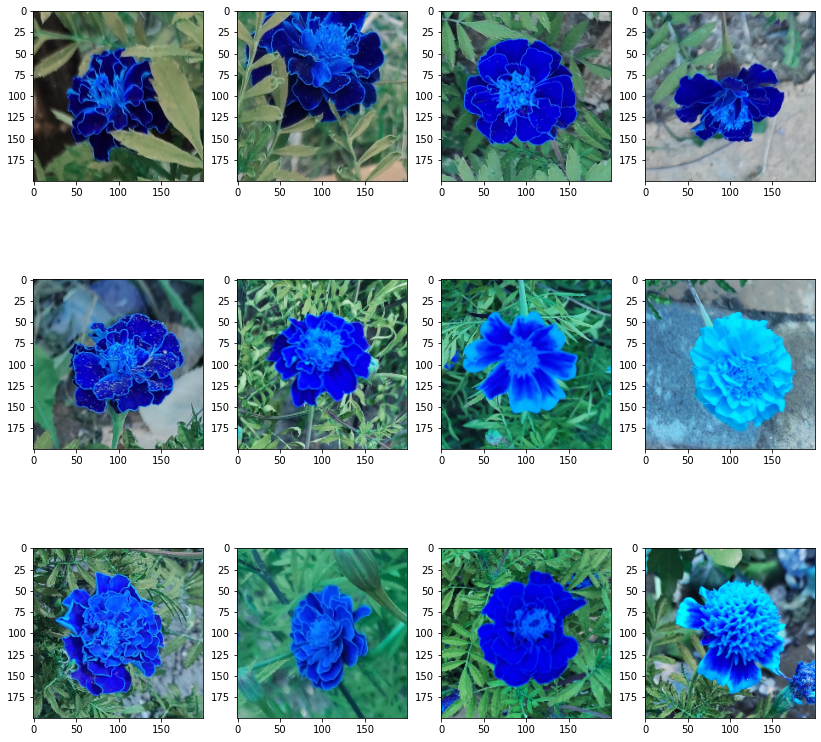

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14,14))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[10 + i**2])
plt.show()

In [7]:
import numpy as np
images = np.array(images)
lables = np.array(lables)

In [8]:
print(f"shape of images:{images.shape}")
print(f"shape of labels:{lables.shape}")

shape of images:(898, 200, 200, 3)
shape of labels:(898,)


In [9]:
from sklearn.model_selection import train_test_split
train_features ,test_features , train_target , test_target = train_test_split(images,lables, test_size=0.1)
print(f"train feature set shape:{train_features.shape}")
print(f"test features shape:{test_features.shape}")
print(f"train target shape:{train_target.shape}")
print(f"test target shape:{test_target.shape}")


train feature set shape:(808, 200, 200, 3)
test features shape:(90, 200, 200, 3)
train target shape:(808,)
test target shape:(90,)


In [10]:
import tensorflow as tf

In [11]:
from tensorflow.keras.utils import to_categorical

train_target = to_categorical(train_target)
test_target = to_categorical(test_target)

print(f"train feature set shape:{train_features.shape}")
print(f"test features shape:{test_features.shape}")
print(f"train target shape:{train_target.shape}")
print(f"test target shape:{test_target.shape}")

train feature set shape:(808, 200, 200, 3)
test features shape:(90, 200, 200, 3)
train target shape:(808, 2)
test target shape:(90, 2)


In [12]:
from keras.backend import batch_normalization
from keras.layers.convolutional import Convolution2D
import keras 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization


model = Sequential()

model.add(Conv2D(150, (2, 2), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(120, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(100, (2, 2), activation='relu'))
model.add(Conv2D(75, (2, 2), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(500,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200,activation='relu'))
model.add(Dense(100, activation = "LeakyReLU"))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2,activation='softmax'))
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 150)     1950      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 150)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 120)       162120    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 120)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 100)       48100     
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 75)        3

In [13]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=['accuracy'])

In [14]:
model.fit(train_features, train_target, validation_data = (test_features, test_target), epochs = 50)

Epoch 1/50
26/26 [==============================] - 19s 217ms/step - loss: 0.0755 - accuracy: 0.9752 - val_loss: 19.7862 - val_accuracy: 0.4889
Epoch 2/50
26/26 [==============================] - 4s 156ms/step - loss: 0.0153 - accuracy: 0.9963 - val_loss: 10.1148 - val_accuracy: 0.4889
Epoch 3/50
26/26 [==============================] - 4s 154ms/step - loss: 0.0168 - accuracy: 0.9988 - val_loss: 5.3362 - val_accuracy: 0.4889
Epoch 4/50
26/26 [==============================] - 4s 153ms/step - loss: 0.0086 - accuracy: 0.9988 - val_loss: 2.9773 - val_accuracy: 0.4889
Epoch 5/50
26/26 [==============================] - 4s 155ms/step - loss: 0.0104 - accuracy: 0.9988 - val_loss: 0.6301 - val_accuracy: 0.4889
Epoch 6/50
26/26 [==============================] - 4s 155ms/step - loss: 0.0141 - accuracy: 0.9975 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 7/50
26/26 [==============================] - 4s 155ms/step - loss: 0.0329 - accuracy: 0.9950 - val_loss: 0.2349 - val_accuracy: 0.8889
Epo

In [24]:
model.save("saved_by_me")

In [25]:
import pickle 

In [26]:
with open('model_pickel','wb') as f:
  pickle.dump(model,f)

In [18]:
#with open('model_pickle','rb') as f:
#  model = pickle.load(f)

In [22]:
import joblib
joblib.dump(model, 'model_joblib')


['model_joblib']

In [ ]:
#model_load = joblib.load('model_joblib')